# CS 171 Project
## Christian Santos
## Taeho Lee
## Nicholas Kim

In [3]:
"""
Briefly describe how your code can be run in each section, what is the sequence to run ? 
"""
"""
Run the code in order
"""

You can use triple single/double quote, or # sign or insert the latex equation, or insert picture for your code 
comments/description if that helps describe better

## Data

In [ ]:
"""
Describe your data source and how you will handle missing value, tranform data, or detect outliter 
"""
"""
TODO:

Out data can be found here: https://www.kaggle.com/uciml/student-alcohol-consumption

The data details information about students from Portugal
"""

### Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

### Extract Data

In [13]:
students = pd.read_csv(r'student-mat.csv')

### Data Clean

In [14]:
"""
Data Cleansing includes but not limit to : 
1. Validate the data type
2. check missing values and decide to drop data or impute data
3. Detect Outliter and decide to drop data or impute data
4. Reformat the data column title
"""

"""
Outlier (Anomaly) detection is important since some machine learnings are not robust to outlier, hence the coefficient 
estimation may serverly impacted by outlier. 

"""

'\nOutlier (Anomaly) detection is important since some machine learnings are not robust to outlier, hence the coefficient \nestimation may serverly impacted by outlier. \n\n'

In [15]:
"""
1. Validate the data type
"""

print(students.dtypes)
print(students.shape)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
(395, 33)


In [16]:
"""
2. check missing values and decide to drop data or impute impute
"""
print(students.isnull().sum()) 

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [17]:
"""
NOTE: This does not summarize non-numerical data types
"""
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [26]:
"""


TODO: reword this
This step we will impute the data by replacing binary columns such as: internet, and sex to have 1's and 0's
"""

students_numerical = students.copy(deep=True)

students_numerical['internet'] = students_numerical.internet.eq('yes').mul(1)
students_numerical['romantic'] = students_numerical.romantic.eq('yes').mul(1)
students_numerical['higher'] = students_numerical.higher.eq('yes').mul(1)
students_numerical['nursery'] = students_numerical.nursery.eq('yes').mul(1)
students_numerical['activities'] = students_numerical.activities.eq('yes').mul(1)
students_numerical['paid'] = students_numerical.paid.eq('yes').mul(1)
students_numerical['famsup'] = students_numerical.famsup.eq('yes').mul(1)
students_numerical['sex'] = students_numerical.sex.eq('M').mul(1)

In [27]:
print(students_numerical.dtypes)

school        object
sex            int32
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup         int32
paid           int32
activities     int32
nursery        int32
higher         int32
internet       int32
romantic       int32
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


In [28]:
"""
TODO: fix wording

Here we see a different representation of our data, and we see that 47% are male and ...
"""
students_numerical.describe()

,sex,age,Medu,Fedu,traveltime,studytime,failures,famsup,paid,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.473418,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,0.612658,0.458228,0.508861,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.499926,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.487761,0.498884,0.500555,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,1.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


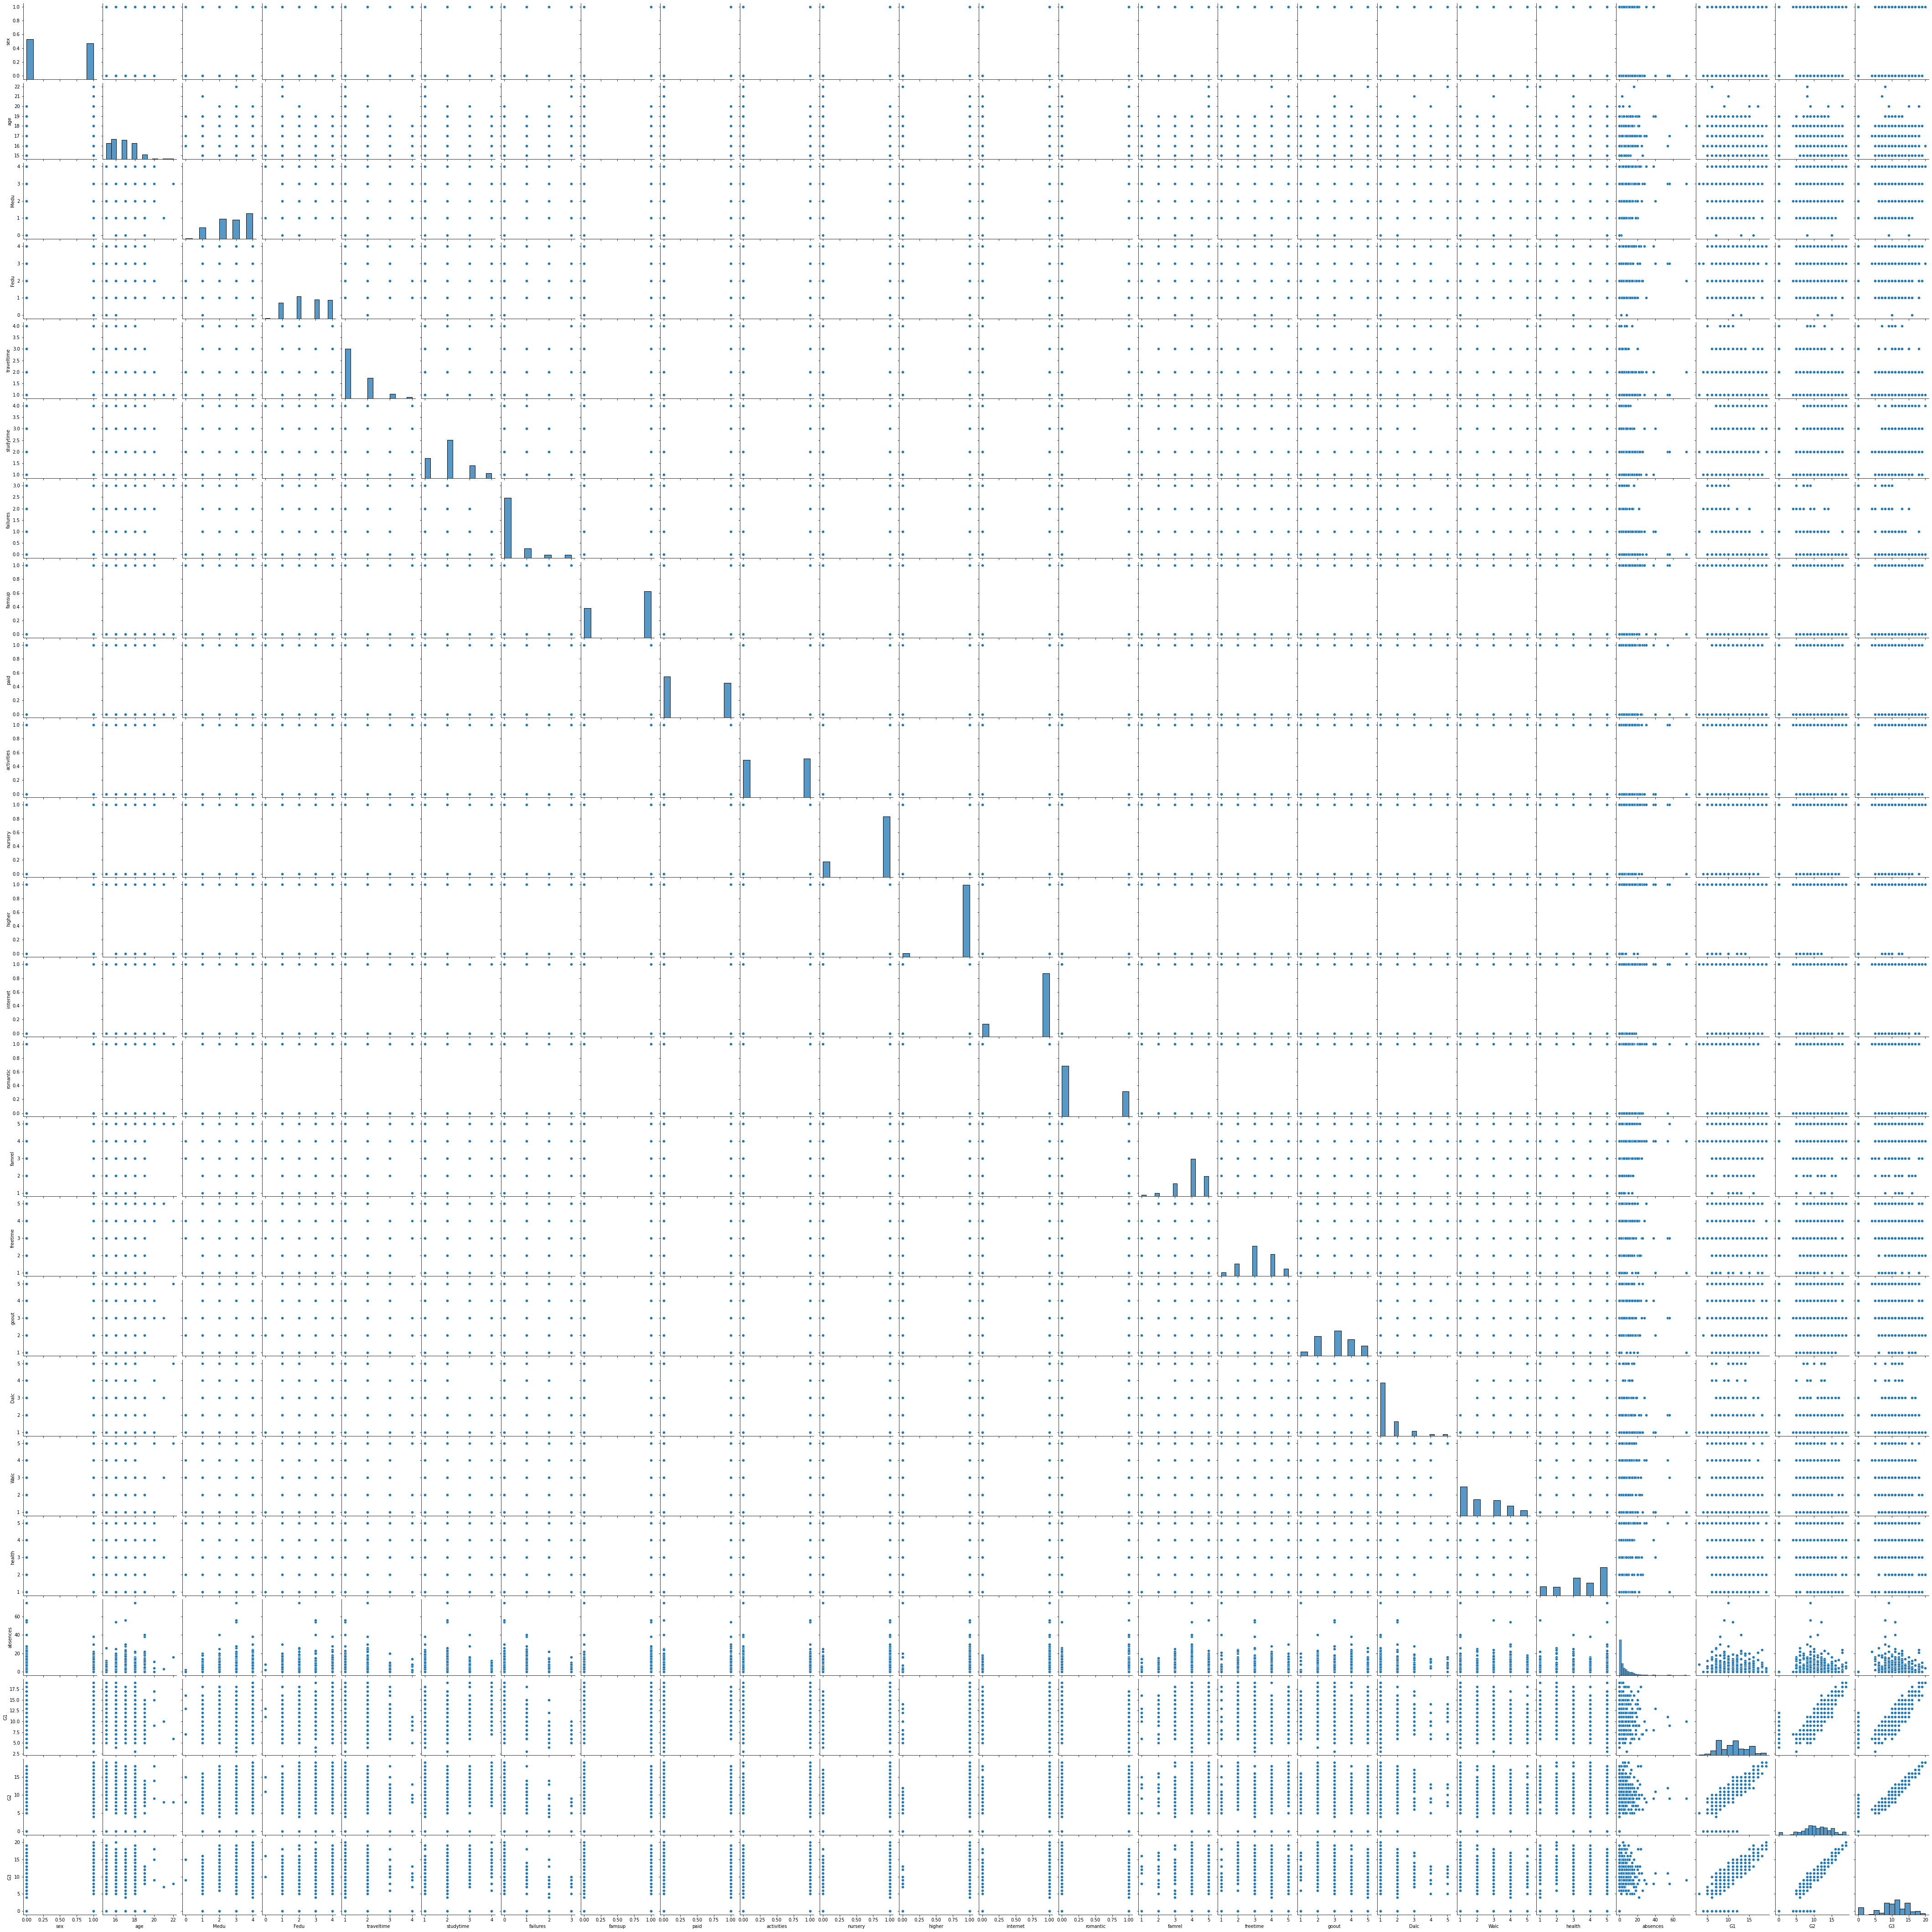

                 sex       age      Medu      Fedu  traveltime  studytime  \
sex         1.000000 -0.028606  0.078228  0.034878    0.059722  -0.306268   
age        -0.028606  1.000000 -0.163658 -0.163438    0.070641  -0.004140   
Medu        0.078228 -0.163658  1.000000  0.623455   -0.171639   0.064944   
Fedu        0.034878 -0.163438  0.623455  1.000000   -0.158194  -0.009175   
traveltime  0.059722  0.070641 -0.171639 -0.158194    1.000000  -0.100909   
studytime  -0.306268 -0.004140  0.064944 -0.009175   -0.100909   1.000000   
failures    0.044436  0.243665 -0.236680 -0.250408    0.092239  -0.173563   
famsup     -0.151623 -0.140609  0.183727  0.185496   -0.003286   0.145228   
paid       -0.129126 -0.035933  0.159700  0.086981   -0.066420   0.167220   
activities  0.099833 -0.103063  0.108277  0.112643   -0.007766   0.089877   
nursery    -0.008203 -0.086632  0.193263  0.157177   -0.033338   0.081325   
higher     -0.151056 -0.209081  0.168845  0.174566   -0.083508   0.175081   

,sex,age,Medu,Fedu,traveltime,studytime,failures,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
sex,1.000000,-0.028606,0.078228,0.034878,0.059722,-0.306268,0.044436,-0.151623,-0.129126,0.099833,-0.008203,-0.151056,0.044113,-0.102023,0.058971,0.238744,0.075897,0.268171,0.274194,0.143588,-0.066962,0.091839,0.091099,0.103456
age,-0.028606,1.000000,-0.163658,-0.163438,0.070641,-0.004140,0.243665,-0.140609,-0.035933,-0.103063,-0.086632,-0.209081,-0.112094,0.164669,0.053940,0.016434,0.126964,0.131125,0.117276,-0.062187,0.175230,-0.064081,-0.143474,-0.161579
Medu,0.078228,-0.163658,1.000000,0.623455,-0.171639,0.064944,-0.236680,0.183727,0.159700,0.108277,0.193263,0.168845,0.201463,0.039681,-0.003914,0.030891,0.064094,0.019834,-0.047123,-0.046878,0.100285,0.205341,0.215527,0.217147
Fedu,0.034878,-0.163438,0.623455,1.000000,-0.158194,-0.009175,-0.250408,0.185496,0.086981,0.112643,0.157177,0.174566,0.127507,0.015602,-0.001370,-0.012846,0.043105,0.002386,-0.012631,0.014742,0.024473,0.190270,0.164893,0.152457
traveltime,0.059722,0.070641,-0.171639,-0.158194,1.000000,-0.100909,0.092239,-0.003286,-0.066420,-0.007766,-0.033338,-0.083508,-0.111302,0.021962,-0.016808,-0.017025,0.028540,0.138325,0.134116,0.007501,-0.012944,-0.093040,-0.153198,-0.117142
studytime,-0.306268,-0.004140,0.064944,-0.009175,-0.100909,1.000000,-0.173563,0.145228,0.167220,0.089877,0.081325,0.175081,0.059422,0.053285,0.039731,-0.143198,-0.063904,-0.196019,-0.253785,-0.075616,-0.062700,0.160612,0.135880,0.097820
failures,0.044436,0.243665,-0.236680,-0.250408,0.092239,-0.173563,1.000000,-0.055075,-0.188039,-0.069341,-0.100734,-0.300316,-0.063451,0.093137,-0.044337,0.091987,0.124561,0.136047,0.141962,0.065827,0.063726,-0.354718,-0.355896,-0.360415
famsup,-0.151623,-0.140609,0.183727,0.185496,-0.003286,0.145228,-0.055075,1.000000,0.293184,-0.001500,0.059536,0.100815,0.103581,0.012440,-0.020436,0.010538,-0.015631,-0.031575,-0.086688,0.029297,0.024353,-0.084569,-0.059166,-0.039157
paid,-0.129126,-0.035933,0.159700,0.086981,-0.066420,0.167220,-0.188039,0.293184,1.000000,-0.021382,0.102143,0.189214,0.153132,0.005536,0.000460,-0.064253,0.010493,0.062465,0.060454,-0.078132,0.007435,0.039079,0.105198,0.101996
activities,0.099833,-0.103063,0.108277,0.112643,-0.007766,0.089877,-0.069341,-0.001500,-0.021382,1.000000,0.002731,0.096484,0.048663,0.019651,0.040687,0.089728,0.046088,-0.066508,-0.037477,0.023923,-0.013610,0.057010,0.050552,0.016100


In [29]:
"""
Using these values we'll do a coorelation chart
"""
sns.pairplot(students_numerical)
plt.show()

corr = students_numerical.corr()
print(corr, type(corr))
corr.style.background_gradient(cmap='coolwarm')
#No obvious correlaiton found in first half independent variables

In [32]:
"""
3. Detect Outliter and decide to drop data or impute data

TODO: fix wording and/or different coulmns
To reduce the amount of information we are working with, we want to focus on a few key statistics that we think will best
represent...

In terms of outliers...
"""

students_reduced = students_numerical[['G1', 'G2', 'G3', 'age', 'Medu', 'Fedu', 'failures', 'romantic', 'paid', 'goout']].astype(float).copy(deep=True)


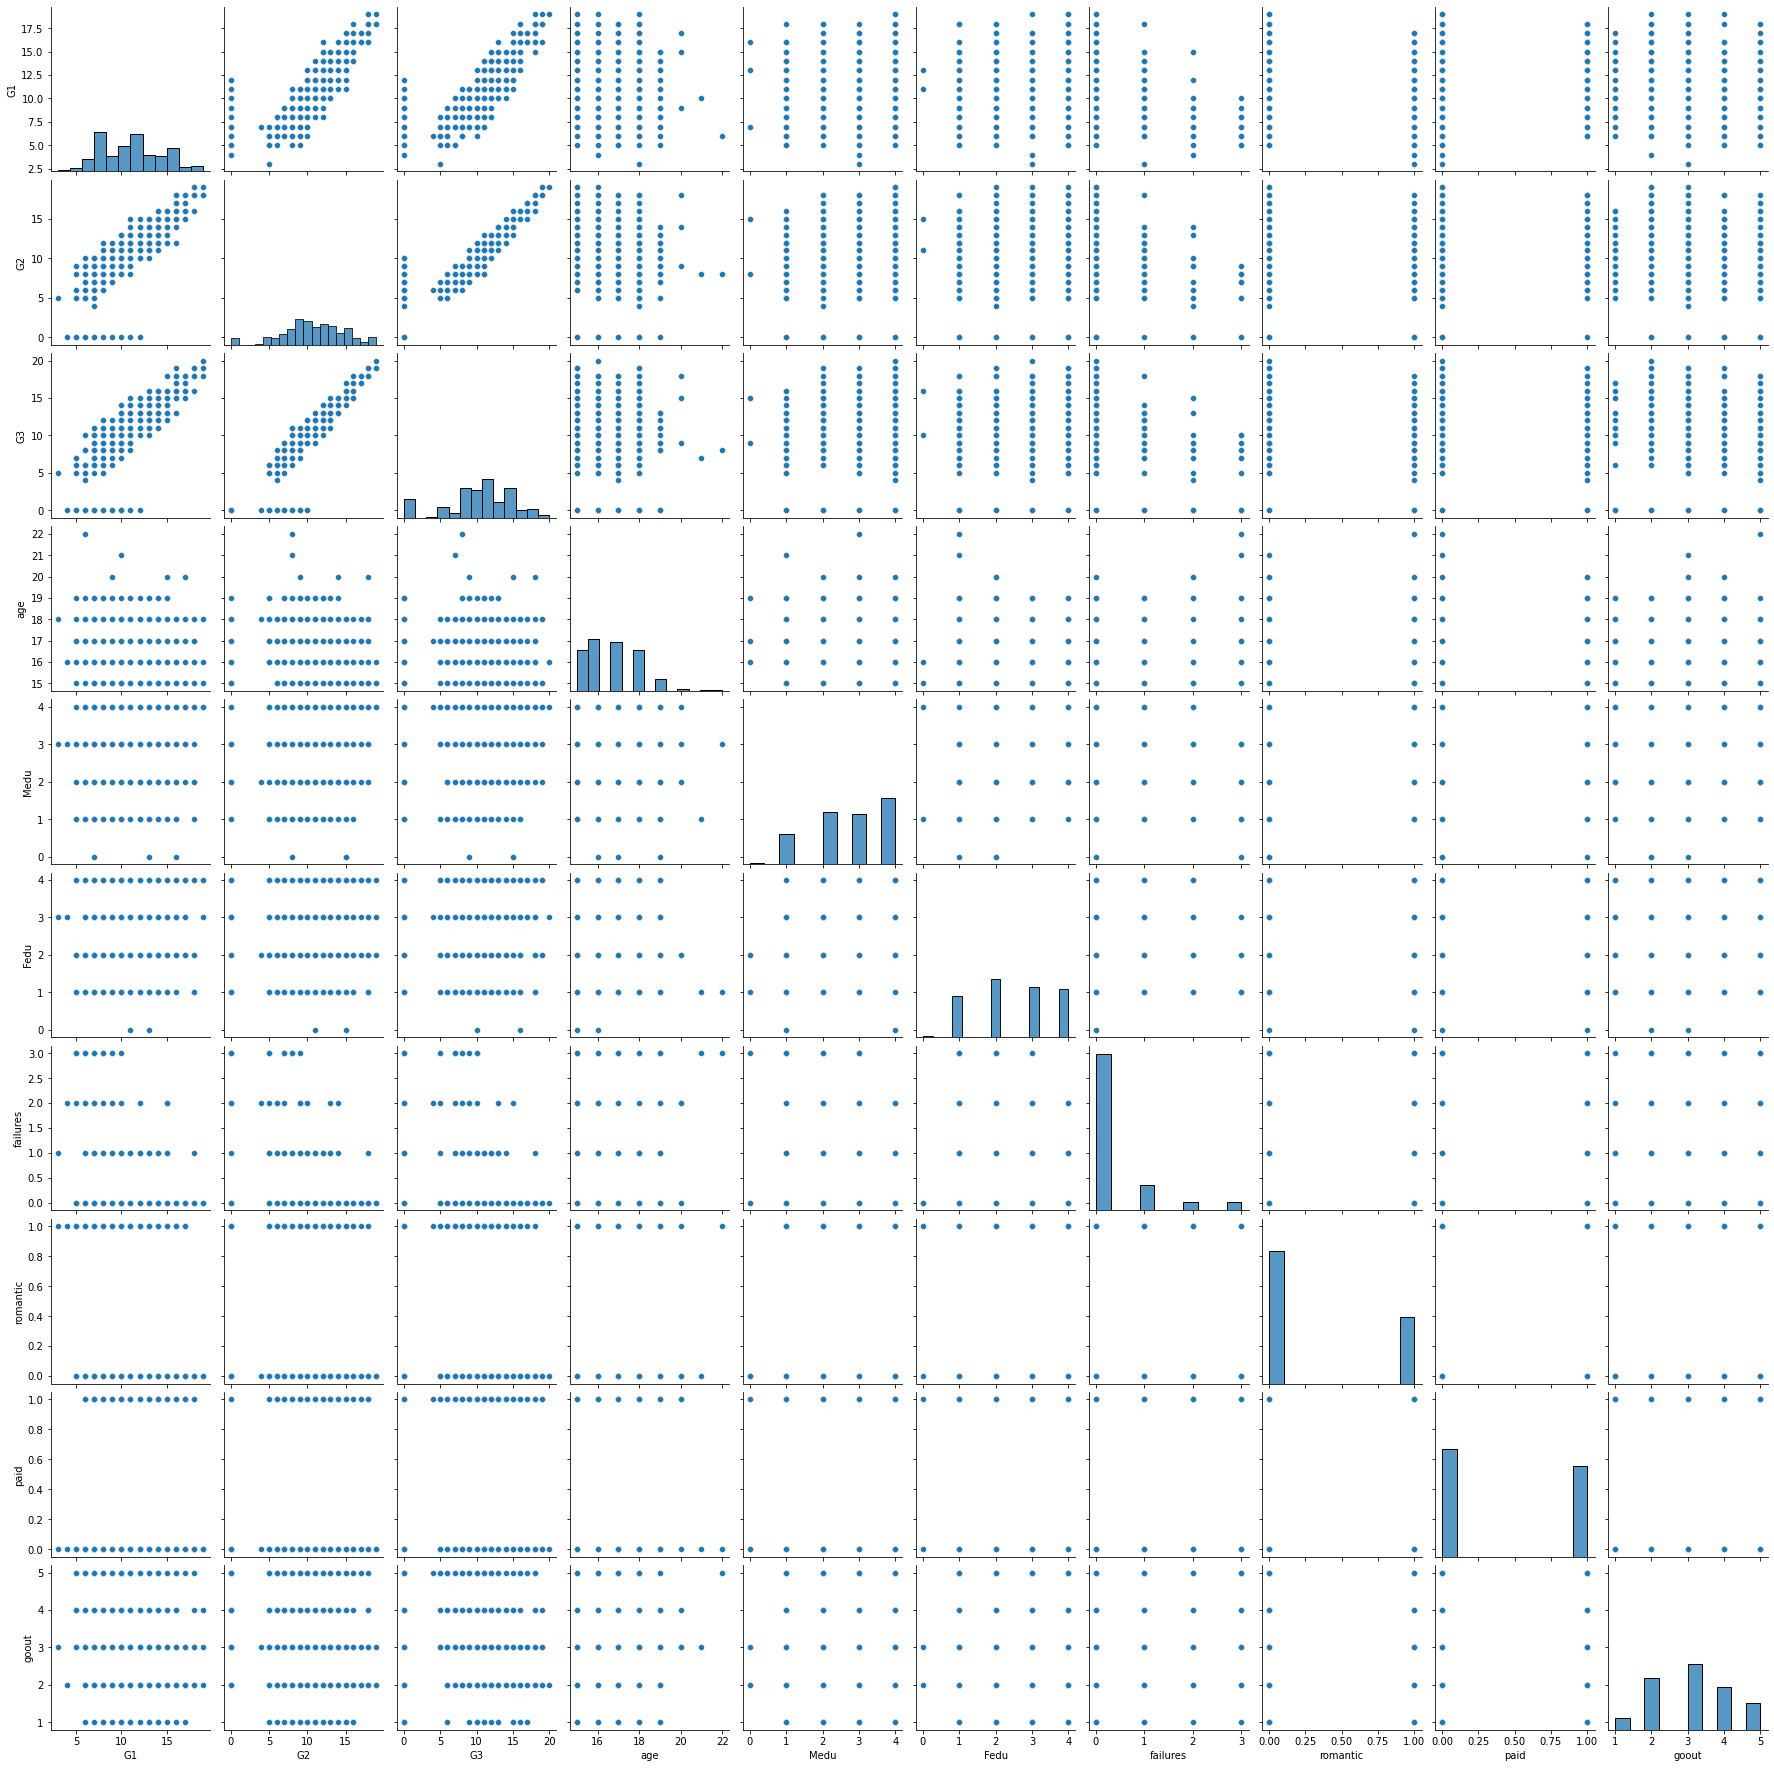

                G1        G2        G3       age      Medu      Fedu  \
G1        1.000000  0.852118  0.801468 -0.064081  0.205341  0.190270   
G2        0.852118  1.000000  0.904868 -0.143474  0.215527  0.164893   
G3        0.801468  0.904868  1.000000 -0.161579  0.217147  0.152457   
age      -0.064081 -0.143474 -0.161579  1.000000 -0.163658 -0.163438   
Medu      0.205341  0.215527  0.217147 -0.163658  1.000000  0.623455   
Fedu      0.190270  0.164893  0.152457 -0.163438  0.623455  1.000000   
failures -0.354718 -0.355896 -0.360415  0.243665 -0.236680 -0.250408   
romantic -0.037188 -0.111774 -0.129970  0.164669  0.039681  0.015602   
paid      0.039079  0.105198  0.101996 -0.035933  0.159700  0.086981   
goout    -0.149104 -0.162250 -0.132791  0.126964  0.064094  0.043105   

          failures  romantic      paid     goout  
G1       -0.354718 -0.037188  0.039079 -0.149104  
G2       -0.355896 -0.111774  0.105198 -0.162250  
G3       -0.360415 -0.129970  0.101996 -0.132791  
age

,G1,G2,G3,age,Medu,Fedu,failures,romantic,paid,goout
G1,1.000000,0.852118,0.801468,-0.064081,0.205341,0.190270,-0.354718,-0.037188,0.039079,-0.149104
G2,0.852118,1.000000,0.904868,-0.143474,0.215527,0.164893,-0.355896,-0.111774,0.105198,-0.162250
G3,0.801468,0.904868,1.000000,-0.161579,0.217147,0.152457,-0.360415,-0.129970,0.101996,-0.132791
age,-0.064081,-0.143474,-0.161579,1.000000,-0.163658,-0.163438,0.243665,0.164669,-0.035933,0.126964
Medu,0.205341,0.215527,0.217147,-0.163658,1.000000,0.623455,-0.236680,0.039681,0.159700,0.064094
Fedu,0.190270,0.164893,0.152457,-0.163438,0.623455,1.000000,-0.250408,0.015602,0.086981,0.043105
failures,-0.354718,-0.355896,-0.360415,0.243665,-0.236680,-0.250408,1.000000,0.093137,-0.188039,0.124561
romantic,-0.037188,-0.111774,-0.129970,0.164669,0.039681,0.015602,0.093137,1.000000,0.005536,0.007870
paid,0.039079,0.105198,0.101996,-0.035933,0.159700,0.086981,-0.188039,0.005536,1.000000,0.010493
goout,-0.149104,-0.162250,-0.132791,0.126964,0.064094,0.043105,0.124561,0.007870,0.010493,1.000000


In [34]:
sns.pairplot(students_reduced)
plt.show()

corr = students_reduced.corr()
print(corr, type(corr))
corr.style.background_gradient(cmap='coolwarm')
#No obvious correlaiton found in first half independent variables

In [ ]:
"""
4. Reformat the data column title
"""

"""
We found this step to be unnecessary, as out data source already formatted column titles.
"""

### Feature Engineering

In [ ]:
"""
Convert Categorical Varaibles to Dummies to prevent Zero Cell Count Error
"""

### Dimension Reduction

In [ ]:
"""
The main motivations for dimensionality reduction are: 
1.To speed up a subsequent training algorithm 
(in some cases it may even remove noise and redundant features, making the training algorithm perform better)
2.To visualize the data and gain insights on the most important features 
3.To save space (compression)

The main drawbacks are: 
1.Some information is lost, possibly degrading the performance of subsequent training algorithms. 
2.It can be computationally intensive. 
3.It adds some complexity to your Machine Learning pipelines. 
4.Transformed features are often hard to interpret.
"""

"""
This step is unnecessary as 
"""

### Regularization

In [ ]:
"""
Regularization is a technique to overcome both overfitting or underfitting of the data.
"""

## Machine Learnig Algorithm Exploration

In [ ]:
"""
Describe what machine learning algorithms are suitable to answer your business questions, fit the model
"""

### Candidate ML Algorithm 1

### Candidate ML Algorithm 2

### Candidate ML Algorithm 3

## In-Sample Validation

In [ ]:
"""
Describe the what metric you will use for testing model performance, and list the performance for each algorithm you tried 
"""

### Peformance of ML Algorithm 1

### Peformance of ML Algorithm 2

### Peformance of ML Algorithm 3

## Ensemble Technique Applied

In [ ]:
"""
Describe the what ensemble technique can be applied to enhance your model performance and how do you apply it, 
you can try couple differnt esenble methods if you want 
"""

In [ ]:
## Conclusion

In [ ]:
"""
Describe what ML Algorithm(s) you finally decide to use, and what Ensemble technique(s) you decide to use, and 
conclude the model performance in terms of metric here
"""